In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def model(X, w_h, w_o):
    h = tf.nn.sigmoid(tf.matmul(X, w_h)) # this is a basic mlp, think 2 stacked logistic regressions
    return tf.matmul(h, w_o) # note that we dont take the softmax at the end because our cost fn does that for us

mnist = input_data.read_data_sets("/home/yang/datasets/mnist", one_hot=False)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Extracting /home/yang/datasets/mnist/train-images-idx3-ubyte.gz
Extracting /home/yang/datasets/mnist/train-labels-idx1-ubyte.gz
Extracting /home/yang/datasets/mnist/t10k-images-idx3-ubyte.gz
Extracting /home/yang/datasets/mnist/t10k-labels-idx1-ubyte.gz


In [3]:
X = tf.placeholder("float", [None, 784])
Y = tf.placeholder("float", [None, 10])

w_h = init_weights([784, 625]) # create symbolic variables
w_o = init_weights([625, 10])

py_x = model(X, w_h, w_o)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=py_x, labels=Y)) # compute costs
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost) # construct an optimizer
predict_op = tf.argmax(py_x, 1)

In [4]:
# # Launch the graph in a session
# with tf.Session() as sess:
#     # you need to initialize all variables
#     tf.global_variables_initializer().run()

#     for i in range(100):
#         for start, end in zip(range(0, len(trX), 128), range(128, len(trX)+1, 128)):
#             sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end]})
#         print(i, np.mean(np.argmax(teY, axis=1) ==
#                          sess.run(predict_op, feed_dict={X: teX})))

In [5]:
from bigdl.util.common import *
from bigdl.nn.layer import *
from bigdl.nn.criterion import *
from bigdl.optim.optimizer import *
from bigdl.util.tf_utils import *

opt_method = Adam(learningrate=0.001)
criterion = CrossEntropyCriterion()

data = trX
label = trY + 1
    
init_engine()

model = Model.train(py_x, data, label, opt_method=opt_method, criterion=criterion, batch_size=128, end_when=MaxEpoch(10))

prediction = np.argmax(model.forward(teX[0]))

print "predition: %s, ground truth: %s" % (prediction, teY[0])

creating: createAdam
creating: createCrossEntropyCriterion
creating: createMaxEpoch
INFO:tensorflow:Froze 2 variables.


INFO:tensorflow:Froze 2 variables.


Converted 2 variables to const ops.
predition: 7, ground truth: 7


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


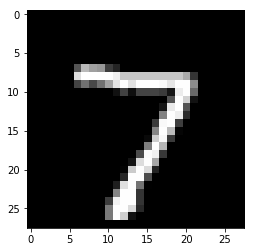

In [6]:
%pylab inline
imshow(teX[0].reshape(28, 28), cmap="gray")